In [2]:
HEAD_PATH = "d:/intern"

- path of data

- Welcome to Quantitative and High Frequency Trading Training Program
- Let's start with basic data analysis with python
- you can use Shift+Enter to run each line of code

- path of our program

In [3]:
DATA_PATH = HEAD_PATH + "/pkl tick/"

- set working directory

In [4]:
import os
os.chdir(DATA_PATH)

- number of cores

In [5]:
CORE_NUM=16

- get working directory

In [6]:
os.getcwd()

'd:\\intern\\pkl tick'

- sample product, you can change to your specific product symbol

In [7]:
product = "j"

- directory of the product's data

In [8]:
dire = DATA_PATH + product
dire

'd:/intern/pkl tick/j'

- get all available data

In [16]:
all_dates = list(map(lambda x: x,os.listdir(DATA_PATH + product)))
len(all_dates)
## 733

733

- get first several dates

In [17]:
all_dates[:6]
#['20151201.pkl',
# '20151202.pkl',
# '20151203.pkl',
# '20151204.pkl',
# '20151207.pkl',
# '20151208.pkl']


['20151201.pkl',
 '20151202.pkl',
 '20151203.pkl',
 '20151204.pkl',
 '20151207.pkl',
 '20151208.pkl']

- get last several dates

In [18]:
all_dates[-6:]
#['20181126.pkl',
# '20181127.pkl',
# '20181128.pkl',
# '20181129.pkl',
# '20181130.pkl',
# '20181203.pkl']

['20181126.pkl',
 '20181127.pkl',
 '20181128.pkl',
 '20181129.pkl',
 '20181130.pkl',
 '20181203.pkl']

- specify a date

In [20]:
date = "20180411"

- loading data set

In [21]:
import pandas as pd
import numpy as np
import math
import _pickle as cPickle
import gzip

with gzip.open(dire+"/"+date+".pkl", 'rb', compresslevel=1) as file_object:
    raw_data = file_object.read()
data = cPickle.loads(raw_data)

- get the column names of data

In [22]:
data.columns
## contract: contract name, product+expiration date
## date.time: date and time
## price: newest price of data
## cum.open.int: cumulative open interest
## open.int: newest open interest increment
## turnover: newest turnover increment
## qty: newest trading volume
## bid: bid price
## ask: ask price
## bid.qty: bid size
## ask.qty: ask size
## date: actual date
## time: acutal time
## milli: actual milli second
## mid.price: middle price of bid and ask
## buy.trade: active buy volume at level 1
## buy2.trade: active buy volume at other levels
## sell.trade: active sell volume at level 1
## sell2.trade: active sell volume at other levels
## log.price: log wpr (to be defined soon)
## ret: log return of last tick
## wpr: volume weighted price
## wpr.ret: price change of wpr
## min.1024: minimum wpr of last 1024 ticks
## max.1024: maximum wpr of last 1024 ticks
## high: highest price of last ask, last price, and this ask
## low: lowest price of last bid, last price, and thsi bid
## min.2048: minimum wpr of last 2048 ticks
## max.2048: maximum wpr of last 2048 ticks
## min.4096: minimum wpr of last 4096 ticks
## max.4096: maximum wpr of last 4096 ticks
## next.bid: estimated active sell price, used for backtesting
## next.ask: estimated active buy price, used for backtesting

## Q：关于这个数据的每个 column 的含义，能否介绍一下？一些缩写我不太了解什么含义？
## A：各名称含义如下：
## contract: 合约的名字，如 rb1605，表示螺纹钢合约，2016 年 5 月到期；
## date.time: 日期和时间合在一起，方便作图用；
## price: 最新的成交价；
## cum.open.int: 总的持仓量；
## open.int: 最新的持仓量改变量
## turnover: 最新的成交额；
## qty: 最新的成交量；
## bid: 买一价；
## ask: 卖一价；
## bid.qty: 买一量；
## ask.qty: 卖一量；
## date: 实际日期；
## time: 实际时间；
## milli: 毫秒数（上期所与中金所是 0、500，大商所随机，郑商所是 0）；
## mid.price: 买一和卖一的中间价；
## buy.trade: 一档主动买量（估算，非交易所提供）；
## buy2.trade: 其他价位主动买量（估算，非交易所提供）；
## sell.trade: 一档主动卖量（估算，非交易所提供）；
## sell2.trade: 其他价位主动买量（估算，非交易所提供）；
## log.price: wpr 的对数（wpr 下面定义）；
## ret: 最新一笔行情的对数收益率；
## wpr: 挂单量加权平均价；
## wpr.ret: wpr 的价格变化；
## min.1024: 过去 1024 笔行情的 wpr 最小值
## max.1024: 过去 1024 笔行情的 wpr 最大值；
## high: 当前 ask、前一个 ask、最新价的最高价（构造最小级别 K 线用）；
## low: 当前 bid、前一个 bid、最新价的最低价（狗仔最小级别 K 线用）；
## min.2048: 过去 2048 笔行情的 wpr 最小值；
## max.2048: 过去 2048 笔行情的 wpr 最大值；
## min.4096: 过去 4096 笔行情的 wpr 最小值；
## max.4096: 过去 4096 笔行情的 wpr 最大值；
## next.bid: 主动卖单的成交价（估算，非交易所提供），用于回测；
## next.ask: 主动买单的成交价（估算，非交易所提供），用于回测；

Index(['market', 'contract', 'date.time', 'price', 'cum.open.int', 'open.int',
       'turnover', 'qty', 'open.symbol', 'close.symbol', 'type', 'dire', 'bid',
       'ask', 'bid.qty', 'ask.qty', 'date', 'time', 'milli', 'mid.price',
       'buy.trade', 'buy2.trade', 'sell.trade', 'sell2.trade', 'log.price',
       'ret', 'wpr', 'wpr.ret', 'next.bid', 'next.ask'],
      dtype='object')

- plot the price

In [23]:
# pip install plotly
import matplotlib.pyplot as plt

plt.figure(1, figsize=(16, 10))
plt.plot(data["price"].values);

- specific a range of price

In [24]:
range_ = (data["time"] >="09:00:00") & (data["time"]<"15:00:01")

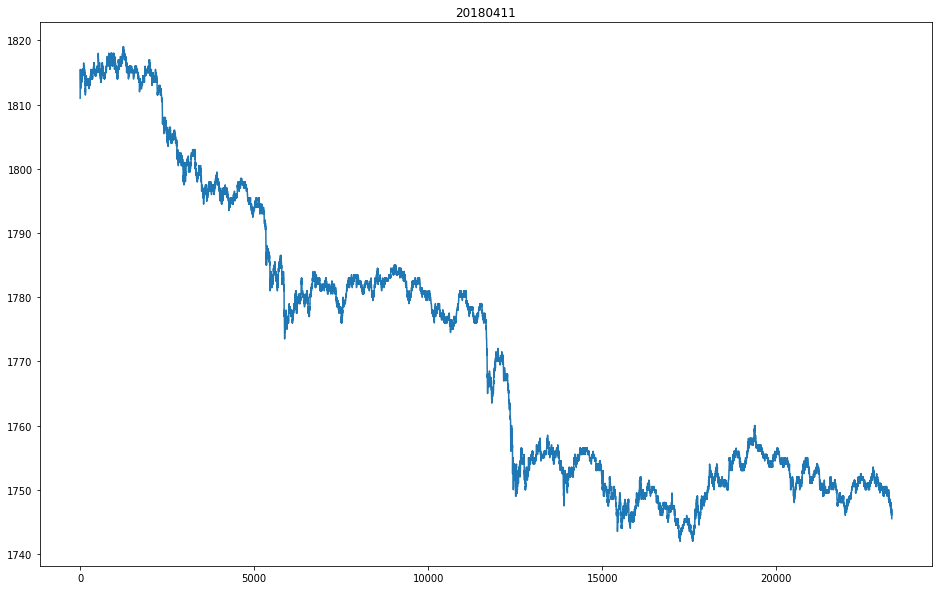

In [25]:
plt.figure(1, figsize=(16, 10))
plt.title(date)
plt.plot(data["price"][range_].values);

- add time

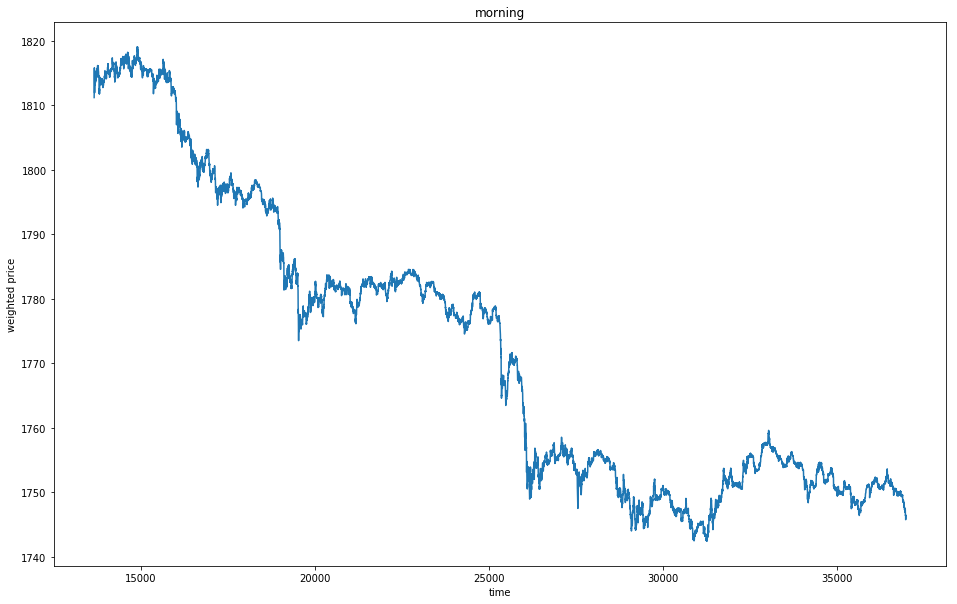

In [26]:
plt.figure(1, figsize=(16, 10))
plt.title("morning")
plt.xlabel("time")
plt.ylabel("weighted price")
plt.plot(data.index[range_].values, data["wpr"][range_].values);
## there is a break between 11:30 and 13:30

- plot price change

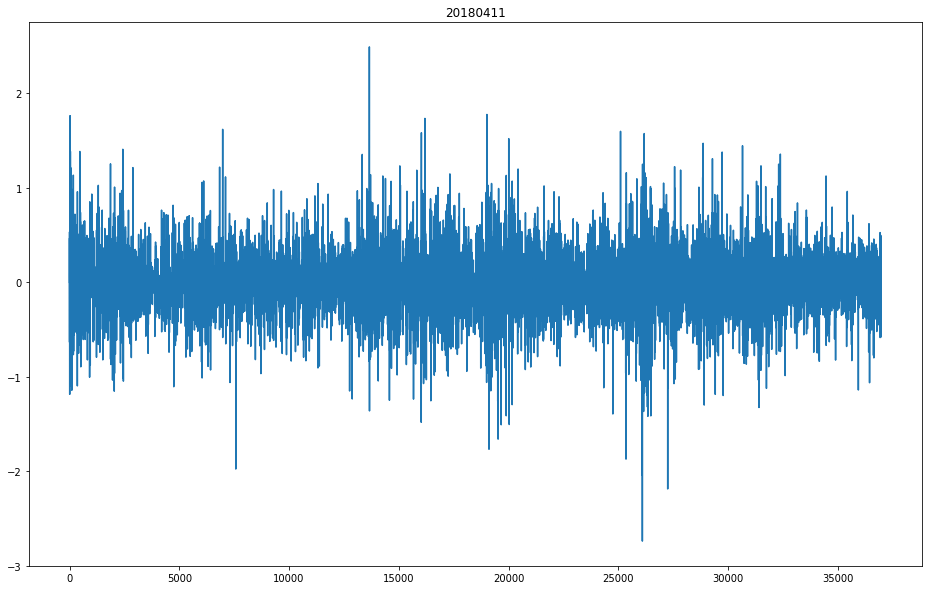

In [27]:
plt.figure(1, figsize=(16, 10))
plt.title(date)
data["wpr.ret"].values[0]=0
plt.plot(data["wpr.ret"].values);

- plot price log return

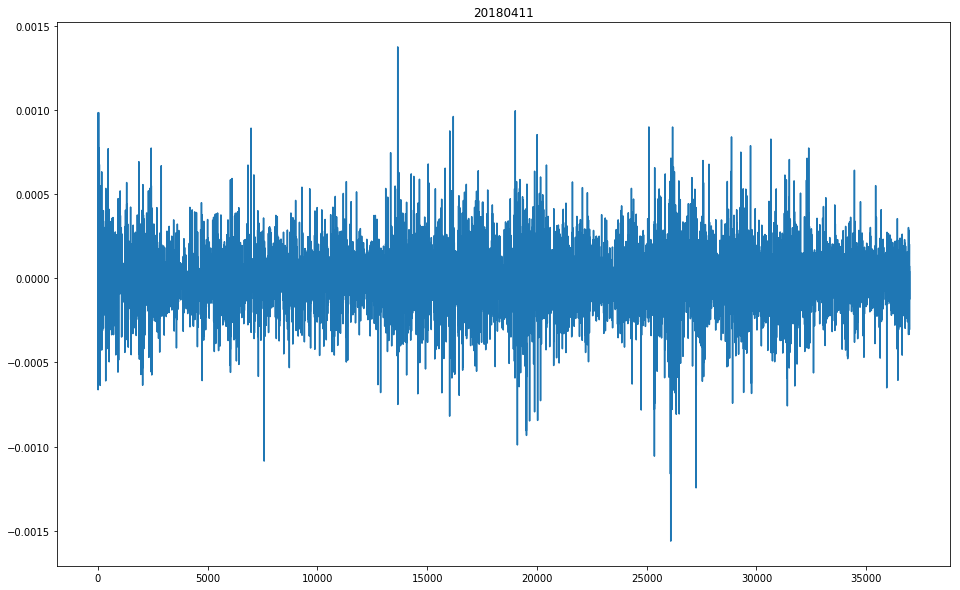

In [28]:
plt.figure(1, figsize=(16, 10))
plt.title(date)
data["ret"].values[0]=0
plt.plot(data["ret"].values);

- count the number of rising ticks

In [29]:
sum(data['ret']>0)
## 17917

17917

- count the number of falling ticks

In [32]:
sum(data['ret']<0)
## 17997

17997

- count the number of total ticks

In [34]:
len(data)
## 36973

36973

- formula to calculate wpr:

In [35]:
wpr = (data["bid"]*data["ask.qty"]+data["ask"]*data["bid.qty"])/(data["bid.qty"]+data["ask.qty"])

- upper limit or lower limit

In [36]:
limit = (data["ask.qty"]==0) | (data["bid.qty"]==0)

- in this case, one of bid and ask price is zero, so using newest price as wpr

In [37]:
wpr[limit] = data["price"][limit]

In [38]:
wpr.head()
#0    1791.300000
#1    1791.833333
#2    1791.200000
#3    1791.666667
#4    1790.947368
#dtype: float64

0    1791.300000
1    1791.833333
2    1791.200000
3    1791.666667
4    1790.947368
dtype: float64

In [39]:
data["wpr"].head()
#0    1791.300000
#1    1791.833333
#2    1791.200000
#3    1791.666667
#4    1790.947368
#Name: wpr, dtype: float64

0    1791.300000
1    1791.833333
2    1791.200000
3    1791.666667
4    1790.947368
Name: wpr, dtype: float64

In [40]:
sum(abs(wpr - data["wpr"]) > 0.00000001)
## 0

0

- Question 1: why using wpr rather than other prices? Such as newest price, or mid-price of bid and ask?


- testing: use mid price rather than wpr

- mid-price is the average of ask and bid

In [41]:
mid_price = (data["ask"]+data["bid"])/2

- special case for upper limit and lower limit

In [45]:
mid_price[limit] = data["price"][limit]

- mid price change

In [46]:
mid_change = mid_price - mid_price.shift(1)
mid_change[0] = 0

- count the number of rising ticks

In [47]:
sum(mid_change>0)
## 4982

4982

- count the number of falling ticks

In [49]:
sum(mid_change<0)
## 5077

5077

- There are very few price changes if we use mid-price
- So wegihted price can catch much more small volatility/price movements
- It's ok for medium-low frequency trading by using mid-price
- But for high frequency trading, those small volatility cannot be neglected


- stationary test for return series

- load related package

In [50]:
import statsmodels.tsa.stattools as ts

In [51]:
result = ts.adfuller(data["ret"], maxlag=int(pow(len(data["ret"])-1,(1/3))), regression='ct', autolag=None)
result
#(-33.72620875175392,
# 0.0,
# 33,
# 36939,
# {'1%': -3.9590151032700245,
#  '5%': -3.4106088620334267,
#  '10%': -3.1271199993576615})

## for this test the smaller the value the more stationary it is
## our value is -33.83, less than 1% which is -3.95
## so it's stationary

(-33.72620875175392,
 0.0,
 33,
 36939,
 {'1%': -3.9590151032700245,
  '5%': -3.4106088620334267,
  '10%': -3.1271199993576615})

In [52]:
result = ts.kpss(data["ret"], regression='c', lags=int(3*math.sqrt(len(data["ret"]))/13))
result

#(0.4518284580166373,
# 0.05481531982041497,
# 44,
# {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

    ## for KPSS test, small value means level, stationary, large value means trend
    ## the value is 0.45 smaller than 5% 0.463, so it's level stationary

(0.4518284580166373,
 0.05481531982041497,
 44,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

- get price movements of 120 ticks, it's about 1 minute

In [53]:
ret_120 = (data["ret"].rolling(120).sum()).dropna().reset_index(drop=True)

- check correctness

In [55]:
sum(data["ret"][0:120])
## [1] 0.001143765903774958

0.001143765903774958

In [56]:
ret_120.iloc[0]
## 0.001143765903774958

0.001143765903774958

- plot the price movements of 120 ticks

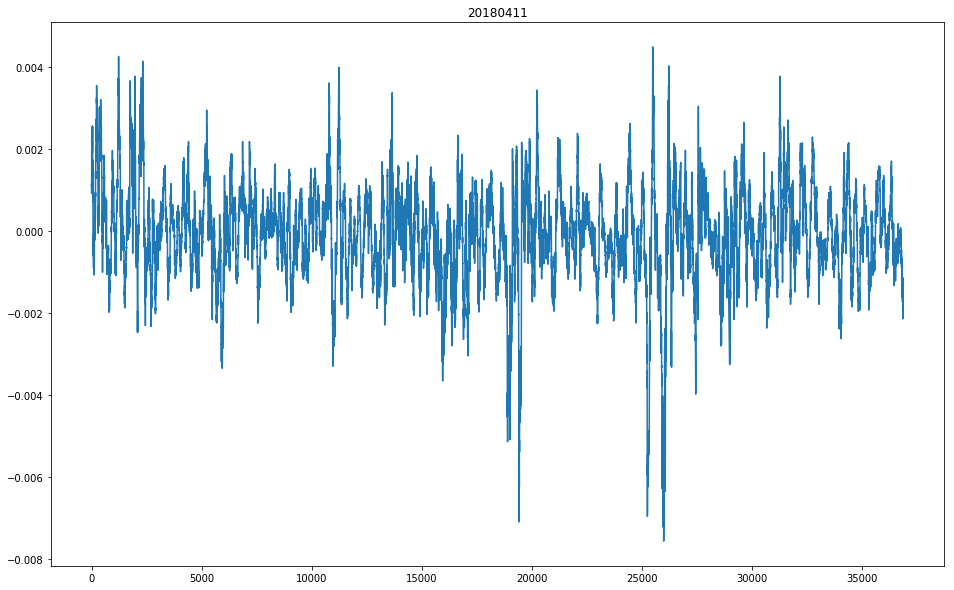

In [57]:
plt.figure(1, figsize=(16, 10))
plt.title(date)
plt.plot(ret_120.values);

- test whether ret.120 is stationary

In [58]:
result = ts.adfuller(ret_120, maxlag=int(pow(len(ret_120)-1,(1/3))), regression='ct', autolag=None)
result

#(-12.811390664439672,
# 2.403257504608761e-20,
# 33,
# 36820,
# {'1%': -3.9590158954964516,
#  '5%': -3.4106092462097655,
#  '10%': -3.127120225600657})

(-12.811390664439672,
 2.403257504608761e-20,
 33,
 36820,
 {'1%': -3.9590158954964516,
  '5%': -3.4106092462097655,
  '10%': -3.127120225600657})

In [59]:
result = ts.kpss(ret_120, regression='c', lags=int(3*math.sqrt(len(ret_120))/13))
result

#(1.3534178038142761,
# 0.01,
# 44,
# {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

    ## its value is 1.35, larger then 1% which is 0.739
    ## so it's not level stationary

d:\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


(1.3534178038142761,
 0.01,
 44,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

- we can check longer period

In [63]:
ret_2000 = (data["ret"].rolling(2000).sum()).dropna().reset_index(drop=True)

- plot the price change

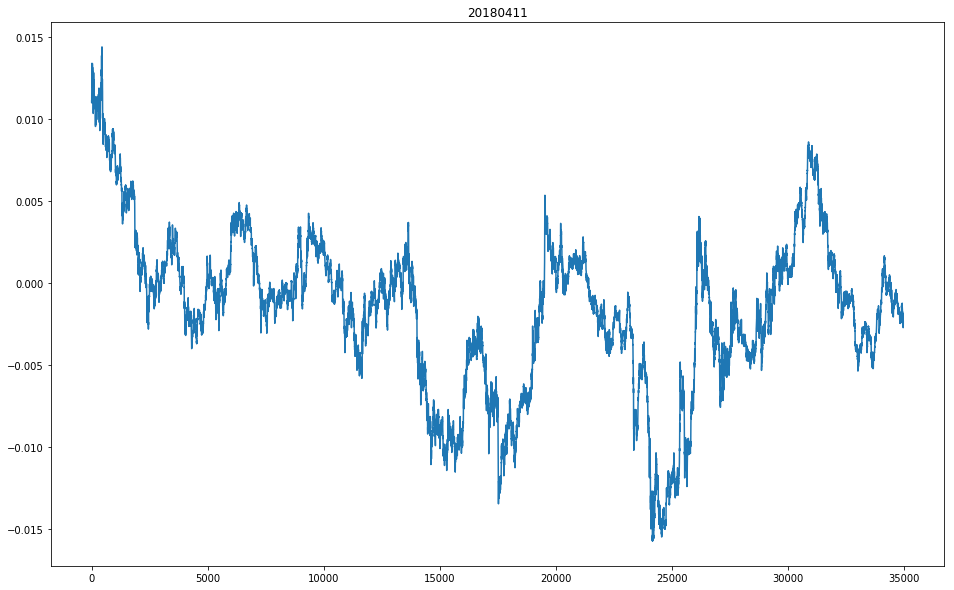

In [64]:
plt.figure(1, figsize=(16, 10))
plt.title(date)
plt.plot(ret_2000.values);

In [65]:
result = ts.adfuller(ret_2000, maxlag=int(pow(len(ret_2000)-1,(1/3))), regression='ct', autolag=None)
result

#(-3.5995059714174116,
# 0.029887937624332072,
# 32,
# 34941,
# {'1%': -3.9590291200512278,
#  '5%': -3.4106156592153782,
#  '10%': -3.127124002242367})

## its pvalue is 0.0298,
## it's stationary under alpha=0.01
## but it's not stationary under alpha=0.05

(-3.5995059714174116,
 0.029887937624332072,
 32,
 34941,
 {'1%': -3.9590291200512278,
  '5%': -3.4106156592153782,
  '10%': -3.127124002242367})

In [66]:
result = ts.kpss(ret_2000, regression='c', lags=int(3*math.sqrt(len(ret_2000))/13))
result

#(12.658970370003045,
# 0.01,
# 43,
# {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

## it's not level stationary under 1%
## so it has trend

d:\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


(12.658970370003045,
 0.01,
 43,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

- we can see that, when period is longer the stationarity is weaker
- so it's harder to predict longer period
- But small period may not have enough volatility to cover transaction cost
- So there is a trade-off to select proper prediction period


- check simple strategy


- set triger threshold

In [67]:
threshold = 0.001

- make up the return series to match uo with original data

In [68]:
ret_2000 = ret_2000.append(pd.Series([0]*(len(data)-len(ret_2000)))).reset_index(drop=True)

- plot price series

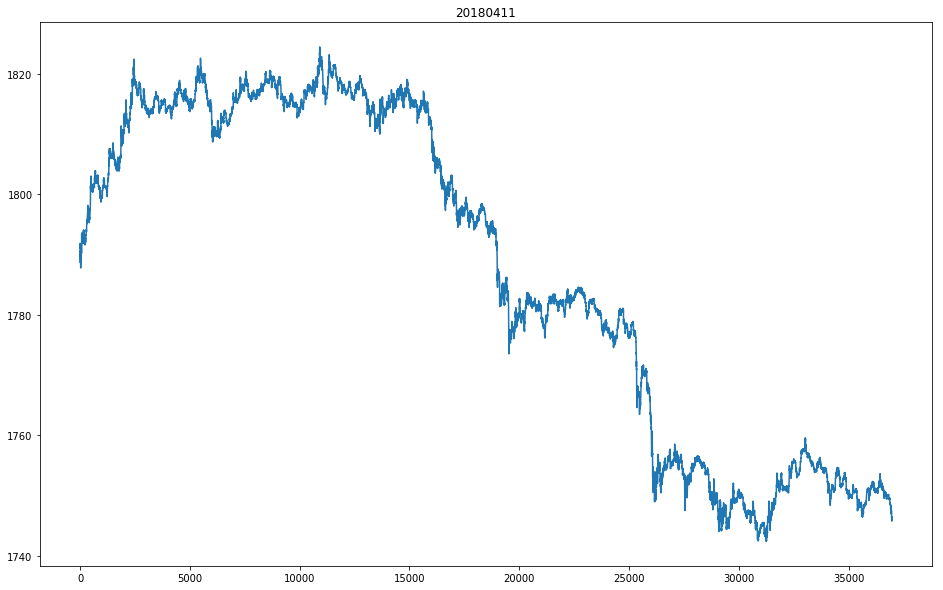

In [70]:
plt.figure(1, figsize=(16, 10))
plt.title(date)
plt.plot(data["wpr"].values);

- number of ticks above the threshold, to be long position

In [71]:
sum(ret_2000>threshold)
## 9119

9119

- number of ticks below negetive threshold, to be short position

In [72]:
sum(ret_2000< -threshold)
## 17993

17993

- set position


- number of ticks

In [73]:
n_bar = len(data)

- initialize all signal to be zero

In [74]:
signal = pd.Series([0] * n_bar)

- above threshold is long signal

In [75]:
signal[ret_2000>threshold] = 1

- below negative threshold is short signal

In [76]:
signal[ret_2000< -threshold] = -1

## ############## The following part is bad example of trading ##########

- set position just the sanme as signal

In [77]:
position = signal.copy()

- close position at the end of day

In [78]:
position[0] = 0
position[n_bar-1] = 0

- calculate change of position

In [79]:
change_pos = position - position.shift(1)
change_pos[0] = 0
## Q：change.pos <- c(0,diff(position))什么意思？
## A：计算仓位的变化，也就是每个时刻需要卖卖多少手，零表示没有变化。

- buy action

In [81]:
sum(change_pos>0)
## 377

377

- sell action

In [83]:
sum(change_pos<0)
## 377

377

- calculate trade price (buy at ask and sell at bid)

In [84]:
change_base = pd.Series([0] * n_bar)

- buy action

In [85]:
change_buy = change_pos>0

- sell action

In [86]:
change_sell = change_pos<0

- transaction cost

In [87]:
tranct = 1.1e-4

- base price of buy, we use the estimated ask price

In [88]:
change_base[change_buy] = (data["next.ask"][change_buy])*(1+tranct)
## actually the calculation of estimated ask price is complicated
## it can be considered between the ask price and next ask price

## Q：change.base[change.buy] <- (data$next.ask[change.buy])*(1+tranct)这句什么意思？
## A：change.buy 是需要买的时间点，此时计算的是买入的价格，用的是下一跳的卖
## 一价；如果价格不变，则直接是卖一价；如果价格恰好变化，则情况较为复杂，
## 会模拟成交的情况，最后得到一个合理的价格。

- base price of sell, we use the estimated bid price

In [89]:
change_base[change_sell] = (data["next.bid"][change_sell])*(1-tranct)

- final.pnl

In [90]:
final_pnl = -sum(change_base*change_pos)
print ("final pnl ", final_pnl, "\n")
## final pnl  -161
## the unit of pnl is the same as the price point

final pnl  -161.10059500007242 



In [91]:
turnover = sum(change_base*abs(change_pos))
print ("turnover ", turnover, "\n")
## turnover  1350914.5013749988

turnover  1350914.5013749988 



- number of trades, only consider open position

In [92]:
num = sum((position!=0) & (change_pos!=0))
print ("trade num ", num, "\n")
## 377

trade num  377 



In [93]:
avg_pnl = final_pnl/num
print ("avg pnl ", avg_pnl, "\n")
## avg pnl  -0.427
## it means each trade loses 0.82 bid-ask spread

avg pnl  -0.4273225331566908 



- average holing period

In [94]:
hld_period = sum(position!=0)/num
print ("holding period ", hld_period, "\n")
## holding period   71.91246684350132 

holding period  71.91246684350132 



- now calculate the raw pnl of each ticks

In [95]:
raw_pnl = -(change_base*change_pos).cumsum()
long_pos = position>0
short_pos = position<0
raw_pnl[long_pos] = raw_pnl[long_pos]+(data["price"][long_pos])*(1-tranct)*position[long_pos]
raw_pnl[short_pos] = raw_pnl[short_pos]+(data["price"][short_pos])*(1+tranct)*position[short_pos]
## Q：请问图中红笔所画两个手续费，开多为什么是 “-” 号，而开空却是“+”号？
## A：这里计算 raw.pnl，如果是多仓，现在计算盯市盈亏的时候，要加上合约
## 的价值，加的时候，要扣除手续费，所以是减号；
## 如果是空仓，现在计算盯市盈亏的时候，要减去合约的价值，此时
## position[short.pos]对应的是负数，所以前庙还是加号，但本质是做减法；做减法
## 的时候，也要扣除手续费，所以里面是加号。
## 总之，手续费是成本，都是对净值有负面影响的。

- plot the raw pnl curve, should be very bad

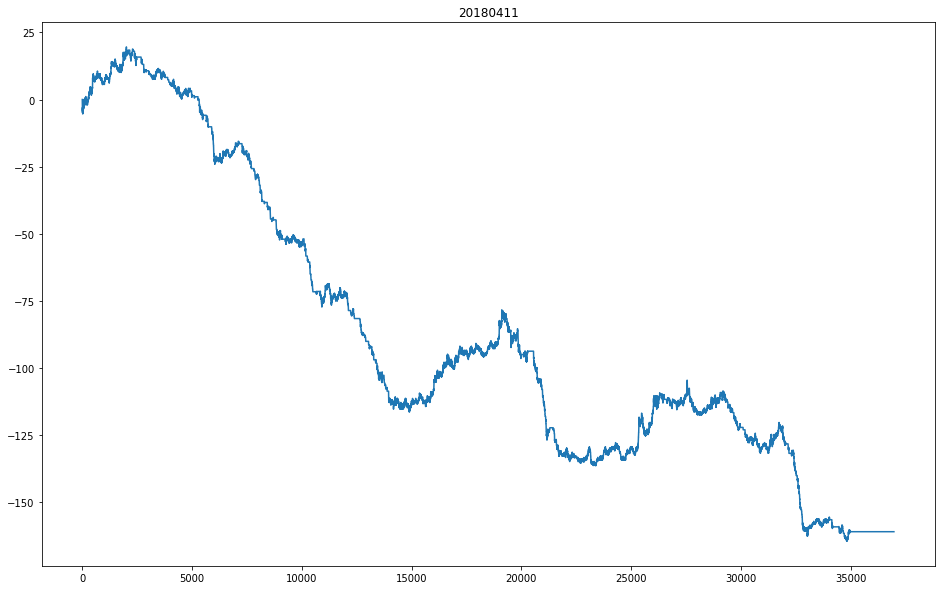

In [96]:
plt.figure(1, figsize=(16, 10))
plt.title(date)
plt.plot(raw_pnl.values);

## #################### now use new trade scheme ###############

- The previous result is terrible, why?
- the reason is holding period is too short
- 120 ticks is simply about 1 minute


- you can try increase the threshold, but it wouldn't help improve the result

- as the threshold increases, the number of trades decrease
- but average holding period and average pnl would not improve


- as the threshold decreases, the number of trades increae
- but average holding period and average pnl would not improve either


- WHY?


- We used the actual price log return rather than predicted value
- so it's not the reason of prediction accuracy


- the reason is that:
- when we increase the threshold, it's hard for the return to reach the threshold
- so it's hard for it to have position, and the holding period is short


- when we decrease the threshold, it's too easy for the return to reach the threhold and even negative of the threshold
- so it's hard for it to keep the same position for a long time


- In above, we need a better trading sCheme which can keep position for a long tim

## ############## better scheme #############

- we need to separate position from signal


- long trades
- we trigger a long trade when signal above the threshold, and keep it
- until we meet the negative threshold

In [97]:
position_pos = pd.Series([np.nan] * n_bar)

- first position is zero

In [98]:
position_pos[0] = 0

- when trigger a buy trade and not reach limit price

In [99]:
position_pos[(signal==1) & (data["next.ask"]>0) & (data["next.bid"]>0)] = 1

- when trigger a reverse signal then close the position

In [100]:
position_pos[(ret_2000< -threshold) & (data["next.bid"]>0)] = 0

- use previous value to fill the NAs

In [101]:
position_pos.ffill(inplace=True)

- short trades

In [102]:
position_neg = pd.Series([np.nan] * n_bar)

- first position is zero

In [103]:
position_neg[0] = 0

- when trigger a sell trade and not reach limit price

In [104]:
position_neg[(signal==-1) & (data["next.ask"]>0) & (data["next.bid"]>0)] = -1

- when trigger a reverse signal then close the position

In [105]:
position_neg[(ret_2000> threshold) & (data["next.ask"]>0)] = 0

- use previous value to fill the NAs

In [106]:
position_neg.ffill(inplace=True)

- then the overall position is thesum of long position and short position

In [107]:
position = position_pos + position_neg
position[0] = 0

- close positon at the end

In [108]:
position[n_bar-1] = 0

- initial position is zero

In [109]:
position[0] = 0

- calculate change of position

In [110]:
change_pos = position - position.shift(1)
change_pos[0] = 0

- buy action

In [112]:
sum(change_pos>0)
## 19

19

- sell action

In [114]:
sum(change_pos<0)
## 18

18

- we can see there are much fewer trades now
- the first open trade and last close trades are both buy
- so there are more buy trades than sell trades 


- calculate trade price (buy at ask and sell at bid)

In [115]:
change_base = pd.Series([0] * n_bar)

- buy action

In [116]:
change_buy = change_pos>0

- sell action

In [117]:
change_sell = change_pos<0

- transaction cost

In [118]:
tranct = 1.1e-4

In [119]:
change_base[change_buy] = (data["ask"][change_buy])*(1+tranct)
change_base[change_sell] = (data["bid"][change_sell])*(1-tranct)

In [120]:
final_pnl = -sum(change_base*change_pos)
print ("final pnl ", final_pnl, "\n")
## final pnl  149.78535999999303 

final pnl  149.78535999999303 



In [122]:
turnover = sum(change_base*abs(change_pos))
print ("turnover ", turnover, "\n")
## turnover  129223.98196

turnover  129223.98196 



- number of trades, only consider open position

In [123]:
num = sum((position!=0) & (change_pos!=0))
print ("trade num ", num, "\n")
## trade num  36

trade num  36 



- we can see the difference between this schreme and the previous bad scheme
- In the bad scheme, both long and short trades are 337,
- and the number of trades is also 337.
- That reason is at the bad scheme open and close positions are 
- usually separated
- But in the good scheme, open and close positions are always together


- People may argue that why using the same threshold for open and close positions
- The main reason is to avoid overfitting
- If there are enough number of trades, using different parameters for open and close
- positions is accteptable
- But if using one parameter can already generate good result
- it's redundant to use anohter parameter

- average pnl of trades

In [124]:
avg_pnl = final_pnl/num
print ("avg pnl ", avg_pnl, "\n")
## avg pnl 4.160704444444251 

## we can see that it's much better

avg pnl  4.160704444444251 



- average holing period

In [125]:
hld_period = sum(position!=0)/num
print ("holding period ", hld_period, "\n")
## holding period   1026.9722222222222 
## the holding period is much longer, it's about 8 minutes

holding period  1026.9722222222222 



- we can change the threshold to get different results:

- we can see that, when use threshold=1e-4, we lose money generally
- One result is that our transaction cost 1.1e-4
- So we know that, even we know the exact price movements,
- we would still lose money due to over trading

- now calculate the raw pnl of each ticks

In [126]:
raw_pnl = -(change_base*change_pos).cumsum()
long_pos = position>0
short_pos = position<0
raw_pnl[long_pos] = raw_pnl[long_pos]+(data["price"][long_pos])*(1-tranct)*position[long_pos]
raw_pnl[short_pos] = raw_pnl[short_pos]+(data["price"][short_pos])*(1+tranct)*position[short_pos]

- plot the raw pnl

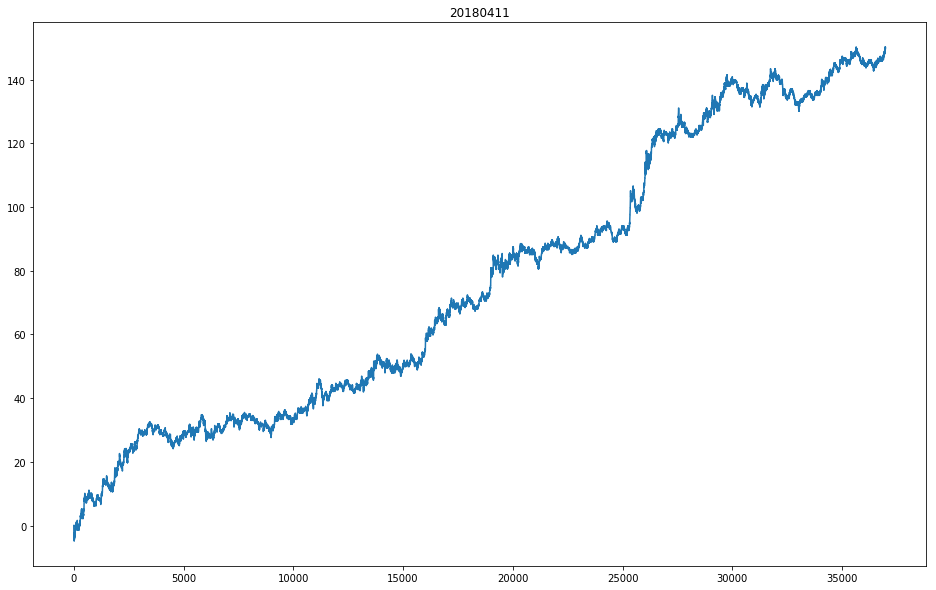

In [127]:
plt.figure(1, figsize=(16, 10))
plt.title(date)
plt.plot(raw_pnl.values);
## we can see the result is much better

- warning: this is simply to illustrade the framework
- In practice, we cannot know the future price change
- In later courses, we will follow the same scheme with predicted price movements

- One may argue why using na.locf rather than for-loop
- we can compare for-loop with na.locf

In [128]:
position_fast = position.copy()

In [129]:
pos = 0
position = pd.Series([0] * n_bar)
for tick in range(1, n_bar-1):
    if (signal[tick]==1) & (data["next.ask"][tick]>0) & (data["next.bid"][tick]>0):
        pos = 1
    elif (signal[tick]==-1) & (data["next.bid"][tick]>0) & (data["next.ask"][tick]>0):
        pos = -1
    elif (pos>0) & (ret_2000[tick]< -threshold) & (data["next.bid"][tick]>0):
        pos = 0
    elif (pos<0) & (ret_2000[tick]> threshold) & (data["next.ask"][tick]>0):
        pos = 0
    position[tick] = pos

In [130]:
sum(position_fast != position)
## all.equal(position.fast, position)
## 0
## so they are equal

0

- now we can compare their speed

In [131]:
%%time
for i in range(1, 101):
    position_pos = pd.Series([np.nan] * n_bar)
    position_pos[0] = 0
    position_pos[(signal==1) & (data["next.ask"]>0) & (data["next.bid"]>0)] = 1
    position_pos[(ret_2000< -threshold) & (data["next.bid"]>0)] = 0
    position_pos.ffill(inplace=True)
    position_neg = pd.Series([np.nan] * n_bar)
    position_neg[0] = 0
    position_neg[(signal==-1) & (data["next.ask"]>0) & (data["next.bid"]>0)] = -1
    position_neg[(ret_2000> threshold) & (data["next.ask"]>0)] = 0
    position_neg.ffill(inplace=True)
    position = position_pos + position_neg
    position[n_bar-1] = 0
## R
## 用户 系统 流逝 
## 0.52 0.00 0.54 
## Python
## CPU times: user 2.16 s, sys: 27 ms, total: 2.19 s
## Wall time: 3.62 s

Wall time: 3.06 s


In [132]:
%%time
for i in range(1, 101):
    pos = 0
    position = pd.Series([0] * n_bar)
    for tick in range(1, n_bar-1):
        if (signal[tick]==1) & (data["next.ask"][tick]>0) & (data["next.bid"][tick]>0):
            pos = 1
        elif (signal[tick]==-1) & (data["next.bid"][tick]>0) & (data["next.ask"][tick]>0):
            pos = -1
        elif (pos>0) & (ret_2000[tick]< -threshold) & (data["next.bid"][tick]>0):
            pos = 0
        elif (pos<0) & (ret_2000[tick]> threshold) & (data["next.ask"][tick]>0):
            pos = 0
        position[tick] = pos

## R
## 用户  系统  流逝 
## 38.20  0.00 38.39 
## Python
## CPU times: user 4min 54s, sys: 0 ns, total: 4min 54s
## Wall time: 7min 10s

Wall time: 6min 36s


- We can see that, to get the same result, using na.locf is about 100x faster
- For just one day, one product, one strategy, one set of parameter, it would not be so important
- But if we have hundreds of days, tens of products, tens of strategies, and dozens of parameters
- The diffference would be significant

- we can also make the above code into a function and run over for all the availabel data


- define a function to get daily result

In [138]:
from collections import OrderedDict
def get_daily_pnl(date, product="rb", period=2000, threshold=0.001, tranct=1.1e-4, noise=0):
    with gzip.open(dire+"/"+date, 'rb', compresslevel=1) as file_object:
        raw_data = file_object.read()
    data = cPickle.loads(raw_data)
    n_bar = len(data)
    unit = np.std(data["ret"])
    np.random.seed(10)
    noise_ret = np.random.normal(scale=unit*noise, size=n_bar)
    ##  we repeat the above code to get daily result
    ret_2000 = (data["ret"].rolling(2000).sum()).dropna().reset_index(drop=True)
    ret_2000 = ret_2000.append(pd.Series([0]*(len(data)-len(ret_2000)))).reset_index(drop=True) + noise_ret
    signal = pd.Series([0] * n_bar)
    signal[ret_2000>threshold] = 1
    signal[ret_2000< -threshold] = -1
    position_pos = pd.Series([np.nan] * n_bar)
    position_pos[0] = 0
    position_pos[(signal==1) & (data["next.ask"]>0) & (data["next.bid"]>0)] = 1
    position_pos[(ret_2000< -threshold) & (data["next.bid"]>0)] = 0
    position_pos.ffill(inplace=True)
    position_neg = pd.Series([np.nan] * n_bar)
    position_neg[0] = 0
    position_neg[(signal==-1) & (data["next.ask"]>0) & (data["next.bid"]>0)] = -1
    position_neg[(ret_2000> threshold) & (data["next.ask"]>0)] = 0
    position_neg.ffill(inplace=True)
    position = position_pos + position_neg
    position[0]=0
    position[n_bar-1] = 0
    position[n_bar-2] = 0
    change_pos = position - position.shift(1)
    change_pos[0] = 0
    change_base = pd.Series([0] * n_bar)
    change_buy = change_pos>0
    change_sell = change_pos<0
    change_base[change_buy] = (data["ask"][change_buy])*(1+tranct)
    change_base[change_sell] = (data["bid"][change_sell])*(1-tranct)
    final_pnl = -sum(change_base*change_pos)
    turnover = sum(change_base*abs(change_pos))
    num = sum((position!=0) & (change_pos!=0))
    hld_period = sum(position!=0)
  
    ## finally we combine the statistics into a data frame
    #result = pd.DataFrame({"final.pnl": final_pnl, "turnover": turnover, "num": num, "hld.period": hld_period}, index=[0])
    #result = {"date": date, "final.pnl": final_pnl, "turnover": turnover, "num": num, "hld.period": hld_period}
    result = OrderedDict([("date", date), ("final.pnl", final_pnl), ("turnover", turnover), ("num", num), ("hld.period", hld_period)])
    return result

- we use the parallel libary here

In [139]:
import dask
from dask import compute, delayed

get_daily_pnl(all_dates[0], product="j", period=2000, threshold=0.001, tranct=1.1e-4)

#OrderedDict([('date', '20151201.pkl'),
#             ('final.pnl', -0.9829650000009451),
#             ('turnover', 13481.499945),
#             ('num', 11),
#             ('hld.period', 15730)])

OrderedDict([('date', '20151201.pkl'),
             ('final.pnl', -0.9829650000009451),
             ('turnover', 13481.499945),
             ('num', 11),
             ('hld.period', 15730)])

In [141]:
%%time
import functools
with dask.config.set(scheduler='processes', num_workers=16):
    f_par = functools.partial(get_daily_pnl, product="j", period=2000, threshold=0.001, tranct=1.1e-4, noise=0)
    result = compute([delayed(f_par)(date) for date in all_dates])[0]
    
## R
## 用户  系统  流逝 
## 0.01  0.00 20.78 

## Python pickle
## CPU times: user 37.9 s, sys: 19.3 s, total: 57.2 s
## Wall time: 1min 33s

## Python cPickle
## CPU times: user 39.6 s, sys: 13 s, total: 52.6 s
## Wall time: 1min 38s

## Python cPickle compresslevel=1
## CPU times: user 264 ms, sys: 183 ms, total: 447 ms
## Wall time: 22.8 s

Wall time: 19.6 s


- the result is in a list, we need to transform it into data frame

In [142]:
aa = pd.DataFrame(result)
aa.set_index("date", inplace=True)

- the col names and row names are opposite

In [143]:
col_names = aa.columns
row_names = aa.index

In [144]:
col_names
## [1] "final.pnl"  "turnover"   "num"        "hld.period"

Index(['final.pnl', 'turnover', 'num', 'hld.period'], dtype='object')

In [145]:
row_names[0:10]

#Index(['20151201.pkl', '20151202.pkl', '20151203.pkl', '20151204.pkl',
#       '20151207.pkl', '20151208.pkl', '20151209.pkl', '20151210.pkl',
#       '20151211.pkl', '20151214.pkl'],
#      dtype='object', name='date')

Index(['20151201.pkl', '20151202.pkl', '20151203.pkl', '20151204.pkl',
       '20151207.pkl', '20151208.pkl', '20151209.pkl', '20151210.pkl',
       '20151211.pkl', '20151214.pkl'],
      dtype='object', name='date')

- transform the result into matrix, and delete all the column and row names

In [147]:
stat = aa.values
stat.shape

## [1] 733   4

(733, 4)

- set column name

In [148]:
stat = np.array(np.rec.fromrecords(aa.values))
np_names = aa.dtypes.index.tolist()
stat.dtype.names = tuple([name for name in np_names])

- transform it into data frame

In [149]:
stat = pd.DataFrame(stat)

- get cumulated pnl

In [150]:
pnl = stat["final.pnl"].cumsum()

- get the date

In [151]:
date_str = [n[0:8] for n in row_names]
date_format = [pd.to_datetime(d) for d in date_str]

- plot the result

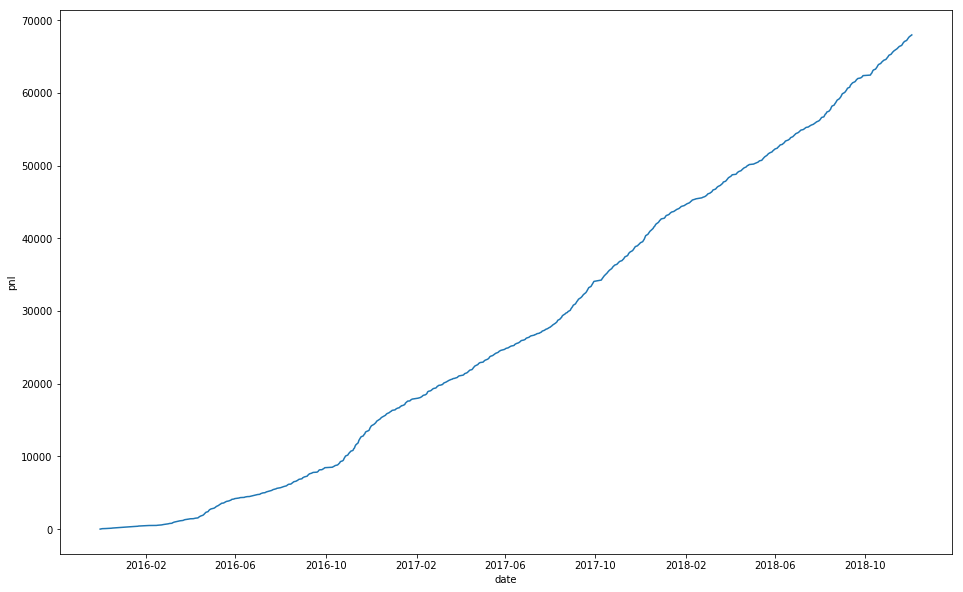

In [152]:
plt.figure(1, figsize=(16, 10))
plt.title("")
plt.xlabel("date")
plt.ylabel("pnl")
plt.plot(date_format, pnl);

## we can see that, even if we know the price movements, we cannot earn money every day
## there is also significant drawdown in the pnl curve

- we can see sum statistics

- number of days

In [153]:
n_days = len(date_str)

- sharpe ratio
- daily mean pnl divided by standard deviation and multiplied by square root of number of annual days

In [154]:
stat["final.pnl"].mean()/stat["final.pnl"].std() * math.sqrt(250)
## 25.9495242887403

25.9495242887403

- it's acceptable but not very high
- In the future we would use predicted value rather than real return value
- Remember that we simply use arbitrary threshold of 0.001 without any optimization
- The number of ticks is 2000 here, it's also arbitrary
- So if we use predicted returns, we must optimize the threshold and number of ticks for each product
- Then we can also get accpetable out-of-sampe result 

- Now let's see other performance statistcs

In [155]:
drawdown = max(pnl.cummax()-pnl)/pnl.iloc[-1]
drawdown
## 1.7675630946118854e-05
## it's profitable every day so no drawdown

1.7675630946118854e-05

- mar

In [156]:
1/drawdown
## 56575.06671463833


56575.06671463833

- winning day ratio

In [157]:
sum(stat["final.pnl"]>0)/n_days
## 0.9959072305593452

0.9959072305593452

- also there is number of trades

In [158]:
sum(stat["num"])
## [1] 20306.0

20306.0

- average number of trades per day

In [159]:
stat["num"].mean()
## 27.702592087312414
## 27 trades per day can be considered very high frequency trading in China today

27.702592087312414

- average pnl per trade

In [160]:
sum(stat["final.pnl"])/sum(stat["num"])
## 3.3470005611640063
## average pnl per trade is also good
## j's bi-ask spread is 0.5, so 3.347 is about 7 spreads

3.3470005611640063

- average holding period

In [161]:
sum(stat["hld.period"])/sum(stat["num"])
## [1]1073.6252339210087
## holding period is about 8 minutes

1073.6252339210087

- we can put all of the performance statistics into a function

In [162]:
from collections import OrderedDict
def get_performance(result):
    stat = pd.DataFrame(result)
    stat.set_index("date", inplace=True)
    pnl = stat["final.pnl"].cumsum()
    plt.figure(1, figsize=(16, 10))
    plt.title("")
    plt.xlabel("date")
    plt.ylabel("pnl")
    plt.plot(stat.index, pnl);
    n_days = len(stat)
    sharpe = stat["final.pnl"].mean()/stat["final.pnl"].std()*math.sqrt(250)
    drawdown = max(pnl.cummax()-pnl)/pnl.iloc[-1]
    mar = 1/drawdown
    win_ratio = sum(stat["final.pnl"]>0)/n_days
    num = stat["num"].mean()
    avg_pnl = sum(stat["final.pnl"])/sum(stat["num"])
    hld_period = sum(stat["hld.period"])/sum(stat["num"])
    return OrderedDict([("sharpe", sharpe), ("drawdown", drawdown), ("mar", mar), ("win.ratio", win_ratio)
                        , ("num", num), ("avg.pnl", avg_pnl), ("hld.period", hld_period)])

In [164]:
%%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl, product="j", period=2000, threshold=0.001, tranct=1.1e-4, noise=0)
    result = compute([delayed(f_par)(date) for date in all_dates])[0]

Wall time: 19.5 s


,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,25.949524,0.000018,56575.066715,0.995907,27.702592,3.347001,1073.625234


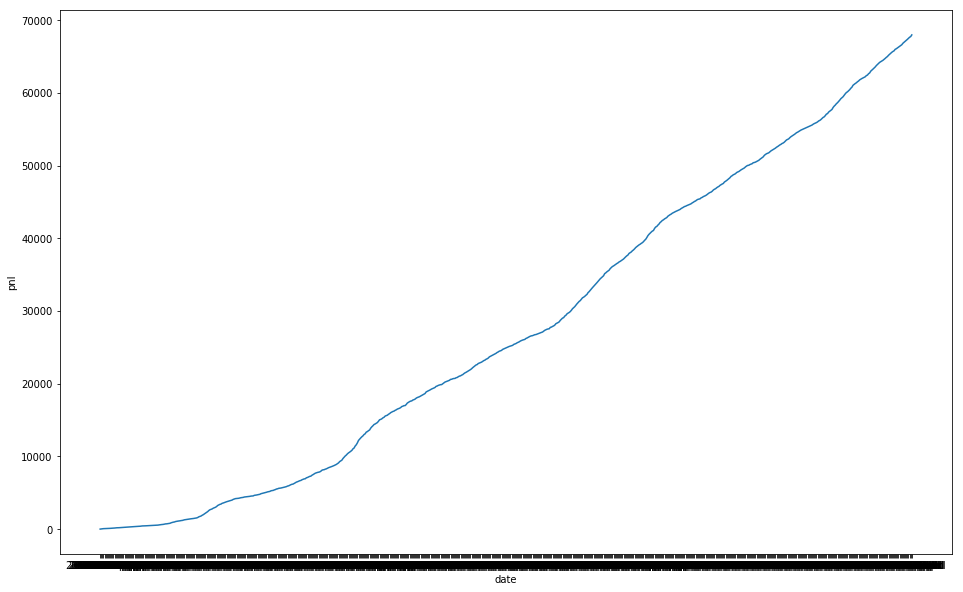

In [167]:
pd.DataFrame(get_performance(result), index=[0])
#sharpe 	drawdown 	mar 	win.ratio 	num 	avg.pnl 	hld.period
#25.949524 	0.000018 	56575.066715 	0.995907 	27.702592 	3.347001 	1073.625234

- Some people may say the result is too good to be true,
- That's because we use the actual return
- In practice we don't know the actual return

- Now we don't have any predictive signals or models at hand
- but we can also add some noise to the actual return and check the performance


- we add normalized noise of 1 unit of standard deviation of the actual return

In [166]:
%%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl, product="j", period=2000, threshold=0.001, tranct=1.1e-4, noise=3)
    result_1 = compute([delayed(f_par)(date) for date in all_dates])[0]
    

## Python
## CPU times: user 23.4 ms, sys: 117 ms, total: 140 ms
## Wall time: 22.5 s

Wall time: 18.8 s


,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,7.898879,0.071798,13.927896,0.985141,47.014859,2.567312,907.7922


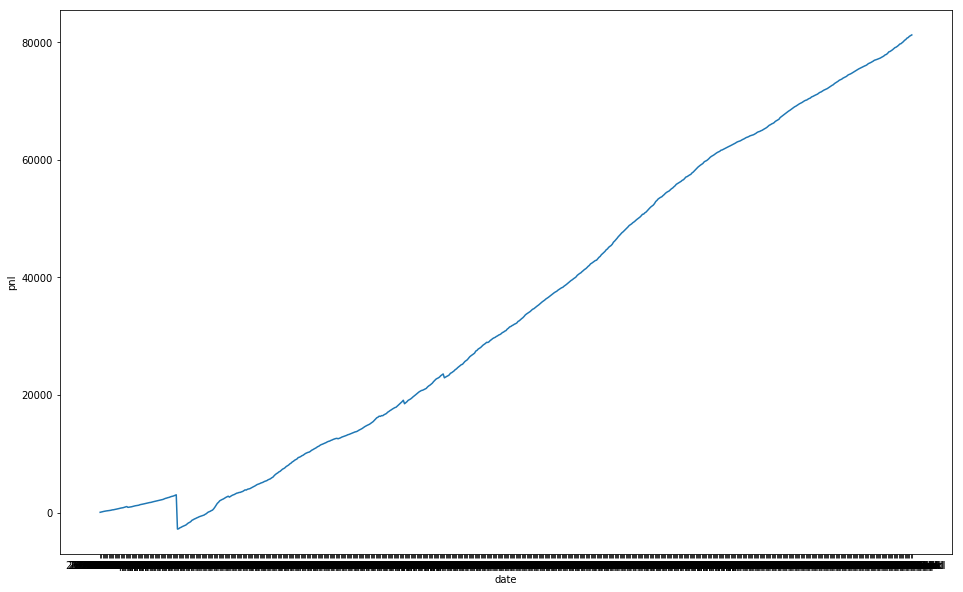

In [422]:
stat_1 = pd.DataFrame(result_1)
pd.DataFrame(get_performance(result_1), index=[0])
## we can see the result is worse, as expected

##sharpe	drawdown	mar	win.ratio	num	avg.pnl	hld.period
##7.898879	0.071798	13.927896	0.985141	47.014859	2.567312	907.7922

- we find that the holding period is shorter
- That's because with more noise, the actual value is larger in magnitude
- so it's eaiser to trigger trades, thought usually bad trades
- so the number of trades increase, but holding period, average pnl, sharpe ratio drops

## Remember that this result use future return so it's only used to explain the backtesting
## process and cannot be compared to real backtesting or trading result.

- Next week we would use a real signal to trigger trade and the result is much more reliable.